In [4]:
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten,GlobalAveragePooling2D,BatchNormalization,Dropout,Activation
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [6]:
train_dir = r'C:\Users\srike\Desktop\rice leaf disease(intern)\Rice Leaf Disease Images'

In [7]:
classes=[]
for file in os.listdir(train_dir):
    classes+=[file]
print(classes)
print(len(classes))

['Bacterialblight', 'Blast', 'Brownspot', 'Healthy', 'Hispa', 'Tungro']
6


**THERE ARE 4 CLASSES OF WHICH 3 OF THEM ARE DISEASE AND 1 IS HEALTHY**

In [8]:

N=[]
for i in range(len(classes)):
    N+=[i]
    
mapping=dict(zip(classes,N)) 
reverse_mapping=dict(zip(N,classes)) 


def mapper(value):
    return reverse_mapping[value]

# **Visualizing the Images**

In [9]:
brownspot = [train_dir + '/BrownSpot/' + img for img in os.listdir(train_dir + '/BrownSpot')[:9]]
healthy = [train_dir  + '/Healthy/' + img for img in os.listdir(train_dir + '/Healthy')[:9]]
hispa = [train_dir  + '/Hispa/' + img for img in os.listdir(train_dir + '/Hispa')[:9]]
Tungro = [train_dir  + '/Tungro/' + img for img in os.listdir(train_dir + '/Tungro')[:9]]
Bacterialblight = [train_dir  + '/Bacterialblight/' + img for img in os.listdir(train_dir + '/Bacterialblight')[:9]]
Blast = [train_dir  + '/Blast/' + img for img in os.listdir(train_dir + '/Blast')[:9]]


# Brown Spot

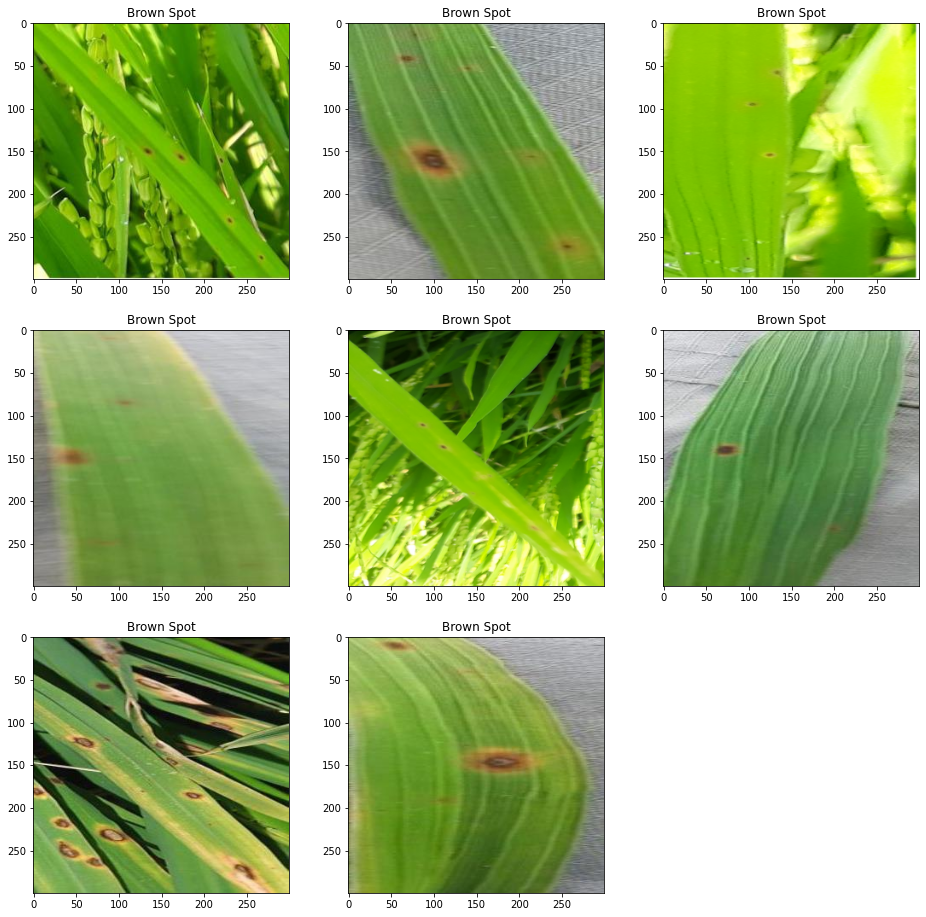

In [10]:
from PIL import Image
plt.figure(figsize=(16,16))
for i,k  in enumerate(brownspot):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Brown Spot")

# Hispa

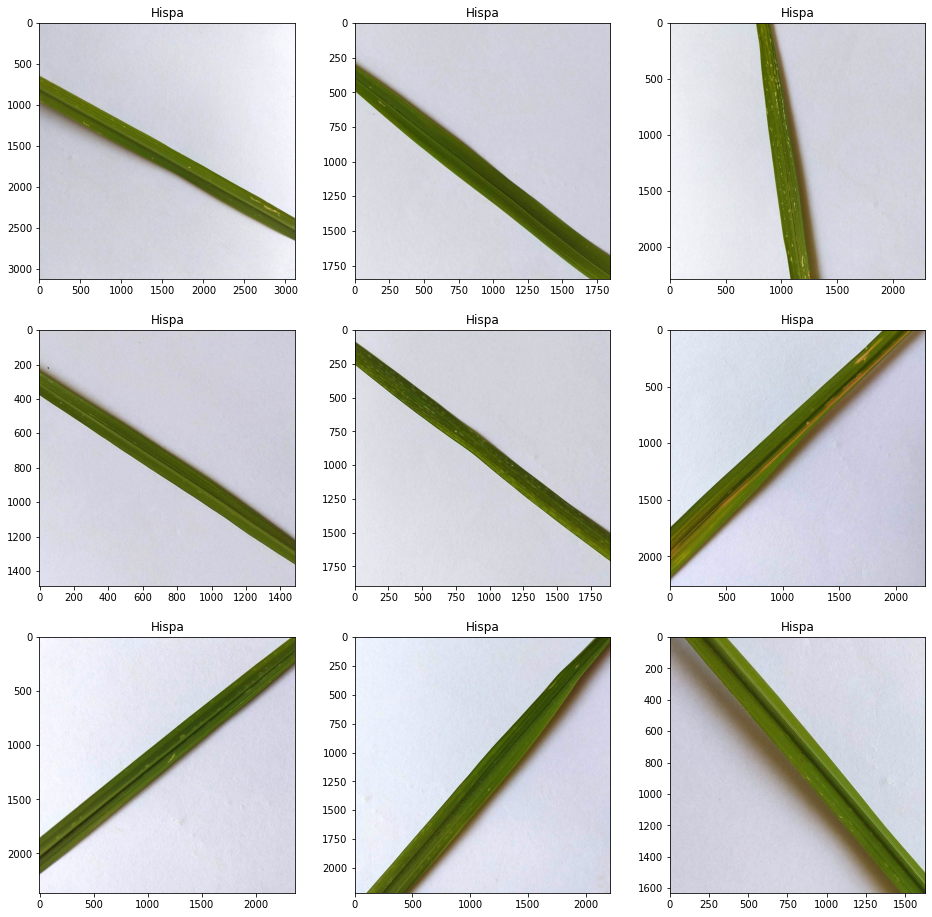

In [11]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(hispa):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Hispa")

# Bacterialblight

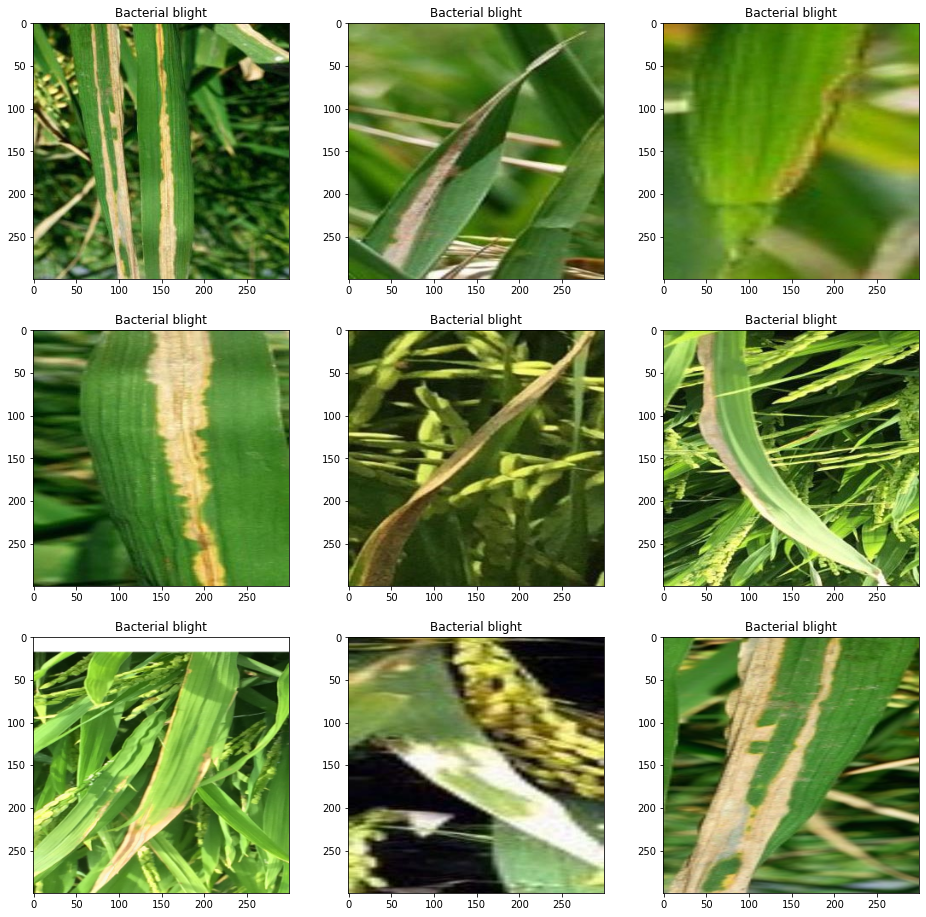

In [12]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(Bacterialblight):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Bacterial blight")

# Healthy

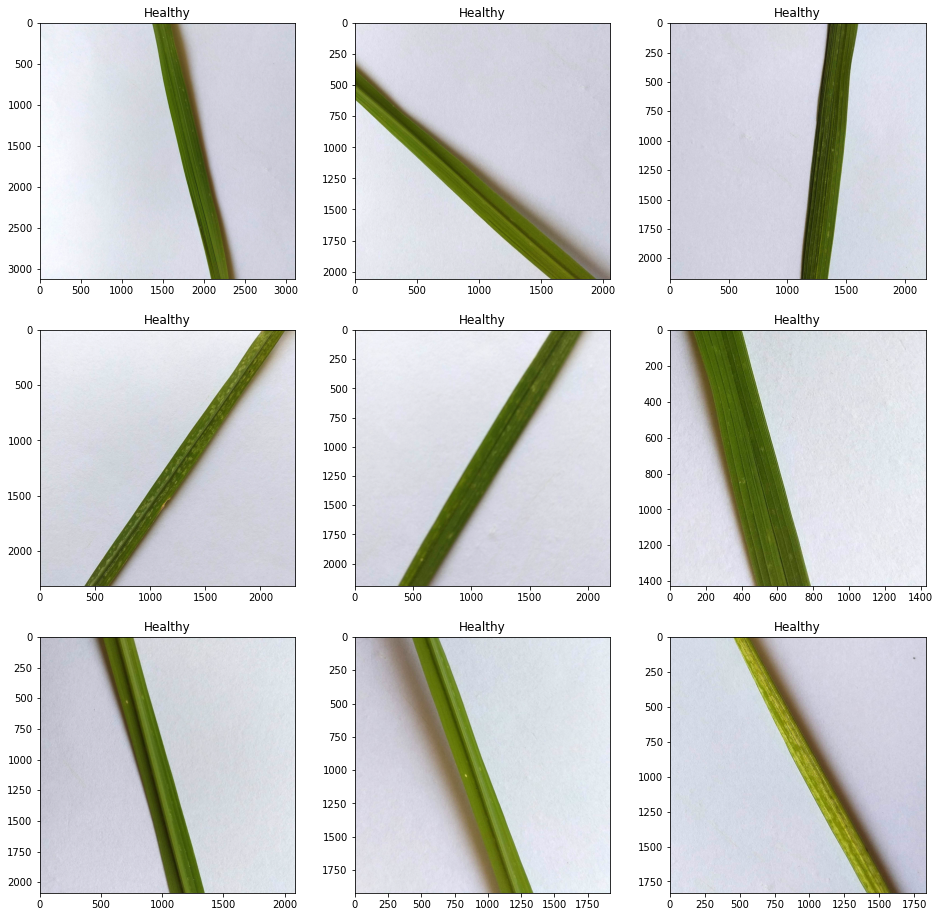

In [13]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(healthy):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Healthy")

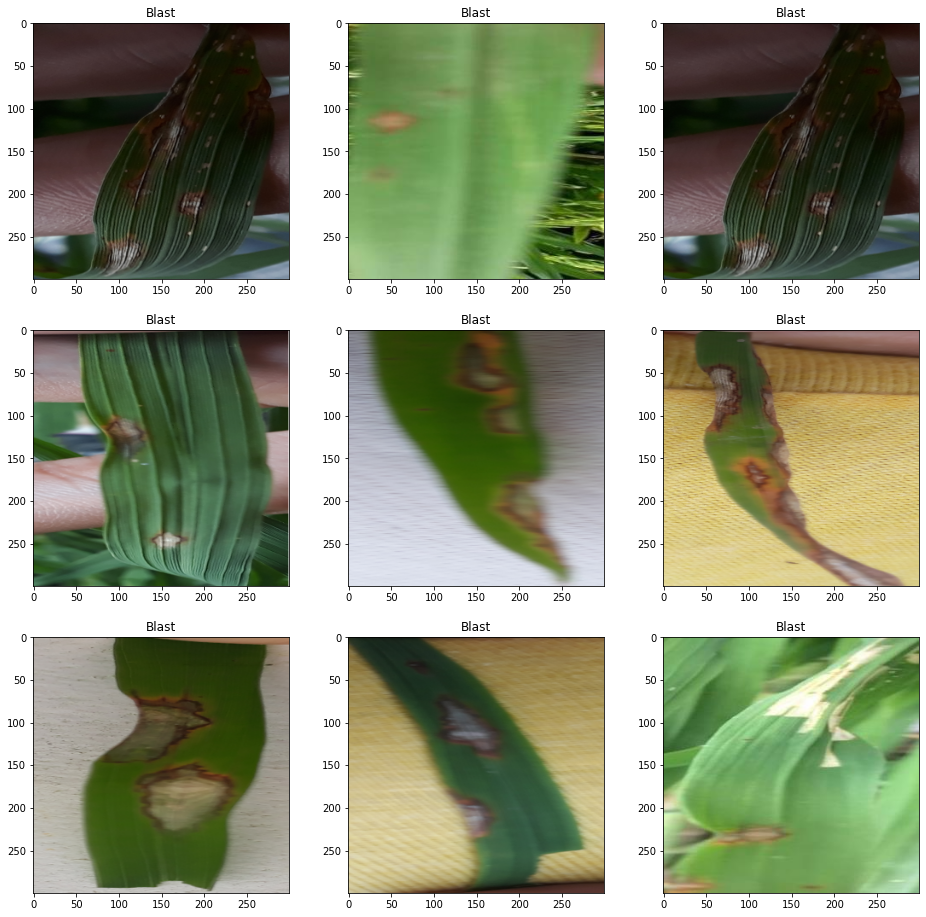

In [14]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(Blast):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Blast")

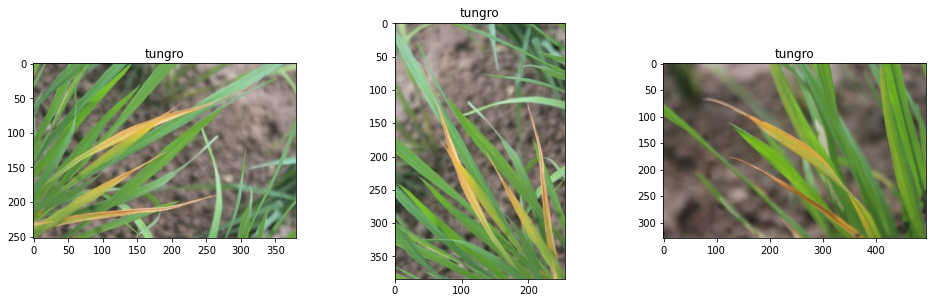

In [15]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(Tungro):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("tungro")

# Reading The Image

In [39]:
!pip install pillow

In [16]:
dataset=[]
shape=(224,224)
count=0
for file in os.listdir(train_dir):
    path=os.path.join(train_dir,file)
    t=0
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=shape)
        image=img_to_array(image)
        image=image/255.0
        dataset+=[[image,count]]
        t+=1
    count=count+1

# Preparing the Data For Out Model


In [21]:
data,labels0=zip(*dataset)

In [22]:
labels1=to_categorical(labels0)
labels=np.array(labels1)


In [24]:
data=np.array(data)

In [25]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=42)

In [26]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(166, 224, 224, 3)
(42, 224, 224, 3)
(166, 6)
(42, 6)


In [27]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=30,zoom_range=0.2,
                        width_shift_range=0.1,height_shift_range=0.2,shear_range=0.2)

# **CHOOSING AND BUILDING A MODEL**

# 1. Simple Convolutional Neural Network 

In [28]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (224,224,3)),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
#     tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
#     tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
# #     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(256,(3,3),activation = 'relu'),
# #     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(512,(3,3),activation = 'relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(512,(3,3),activation = 'relu'),
#     tf.keras.layers.Conv2D(1024,(3,3),activation = 'relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(1024,activation = 'relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(512,activation = 'relu'),
#     tf.keras.layers.Dropout(0.3),
#     tf.keras.layers.Dense(256,activation = 'relu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(4,activation = 'softmax')

# ],    name = 'Conv2D_Model')

# model.summary()

In [29]:
# LEARNING_RATE = 0.001 #@param {type:"number"}

# model.compile(optimizer = tf.keras.optimizers.Adam(),
#               loss = 'categorical_crossentropy',
#               metrics = ['categorical_accuracy'])

In [30]:
 #@param {type:"integer"}

# his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=10)

In [31]:
# get_acc = his.history['categorical_accuracy']
# value_acc = his.history['val_categorical_accuracy']
# get_loss = his.history['loss']
# validation_loss = his.history['val_loss']

# epochs = range(len(get_acc))
# plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
# plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
# plt.title('Training vs validation accuracy')
# plt.legend(loc=0)
# plt.figure()
# plt.show()

# Using Transfer Learning Technique

In [32]:
pretrained_model3 = tf.keras.applications.InceptionV3(input_shape=(224,224,3),include_top=False,weights='imagenet')
 

87916544/87910968 [==============================] - 109s 1us/step


In [44]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Flatten()(pretrained_model3.output)
x3 = tf.keras.layers.Dense(1024, activation='relu')(x3)
x3 = tf.keras.layers.BatchNormalization()(x3)
x3 = tf.keras.layers.Dropout(0.2)(x3)
# # x3 = GlobalAveragePooling2D()(pretrained_model3.output)
# x3 = tf.keras.layers.Dense(512, activation='relu')(x3)
# # x3 = tf.keras.layers.BatchNormalization()(x3)
# x3 = tf.keras.layers.Dropout(0.1)(x3)
# x3 = tf.keras.layers.Dense(128, activation='relu')(x3)
# x3 = tf.keras.layers.Dropout(0.3)(x3)
# x3 = tf.keras.layers.Dense(64, activation='relu')(x3)
# # x3 = tf.keras.layers.Dropout(0.2)(x3)
# x3 = tf.keras.layers.Dense(32, activation='relu')(x3)
# x3 = tf.keras.layers.Dropout(0.2)(x3)
# x3 = tf.keras.layers.Dense(16, activation='relu')(x3)
outputs3 = tf.keras.layers.Dense(6, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [45]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate = 0.0001)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [48]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=10)

Epoch 1/10
6/6 [==============================] - 46s 8s/step - loss: 1.2074 - accuracy: 0.6807 - val_loss: 1.8918 - val_accuracy: 0.5952
Epoch 2/10
6/6 [==============================] - 43s 7s/step - loss: 0.7958 - accuracy: 0.7349 - val_loss: 4.4373 - val_accuracy: 0.4524
Epoch 3/10
6/6 [==============================] - 38s 6s/step - loss: 0.8183 - accuracy: 0.7410 - val_loss: 2.9315 - val_accuracy: 0.5238
Epoch 4/10
6/6 [==============================] - 33s 6s/step - loss: 0.8375 - accuracy: 0.7470 - val_loss: 2.1094 - val_accuracy: 0.5476
Epoch 5/10
6/6 [==============================] - 30s 5s/step - loss: 0.6661 - accuracy: 0.7651 - val_loss: 2.1088 - val_accuracy: 0.5476
Epoch 6/10
6/6 [==============================] - 31s 5s/step - loss: 0.7490 - accuracy: 0.7590 - val_loss: 1.6945 - val_accuracy: 0.5714
Epoch 7/10
6/6 [==============================] - 30s 5s/step - loss: 0.5215 - accuracy: 0.8012 - val_loss: 1.4773 - val_accuracy: 0.6429
Epoch 8/10
6/6 [==================

# Predictions And Results 

In [49]:
from sklearn.metrics import classification_report
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.50      0.67         6
           3       0.68      0.83      0.75        18
           4       0.77      0.59      0.67        17
           5       0.00      0.00      0.00         0

    accuracy                           0.67        42
   macro avg       0.49      0.38      0.42        42
weighted avg       0.75      0.67      0.69        42



C:\Users\srike\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srike\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srike\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srike\

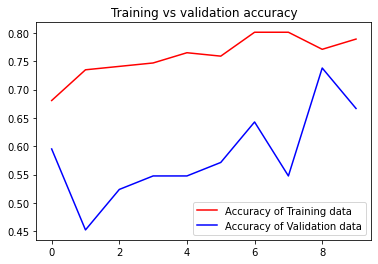

<Figure size 432x288 with 0 Axes>

In [50]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()


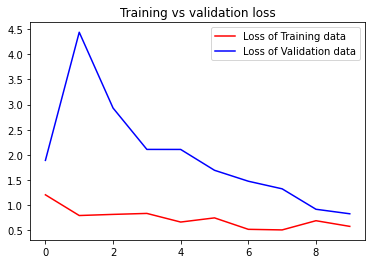

<Figure size 432x288 with 0 Axes>

In [51]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [52]:
model.save('ResNetForPlant.h5')